In [74]:
import pandas as pd
import numpy as np

from sklearn import cluster, metrics

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot') 
%matplotlib inline 


from sklearn import datasets

## Step 1: Import and format the data

In [75]:
iris = datasets.load_iris()

In [77]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

## Step 2: Plot the data to estimate clusters

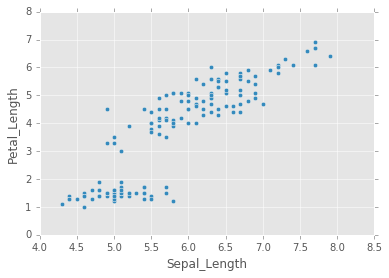

In [161]:
X.plot(kind='scatter', x='Sepal_Length', y='Petal_Length')

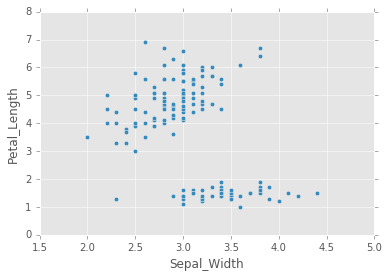

In [162]:
X.plot(kind='scatter', x='Sepal_Width', y='Petal_Length')

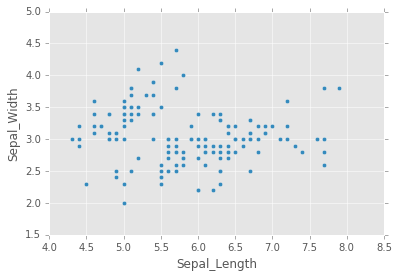

In [163]:
X.plot(kind='scatter', x='Sepal_Length', y='Sepal_Width')

## Step 3: Cluster the data

#### Run the cluster analysis 

In [175]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
pred_cluster = kmeans.fit_predict(X)

#### Compute the labels and centroids

In [176]:
centroids = kmeans.cluster_centers_

In [177]:
# these are the assigned classes or labels
pred_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [178]:
# centroid is in 4D-space
centroids

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

## Step 4: Evaluate the clusters

#### Plot the clusters

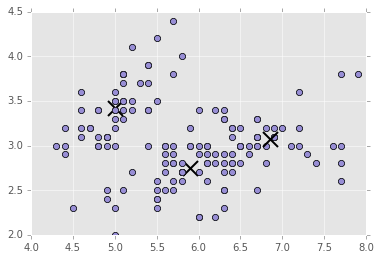

In [179]:
for i in range(k):
    plt.plot(iris.data[:,0], iris.data[:,1], 'o') # plotting one dim vs. another
    lines = plt.plot(centroids[i,0], centroids[i,1],'kx')
    plt.setp(lines, ms=15.0)
    plt.setp(lines, mew=2.0)
plt.show()

#### Check the predicted vs actual classifcations

In [180]:
colormap = np.array(['red', 'blue', 'yellow'])

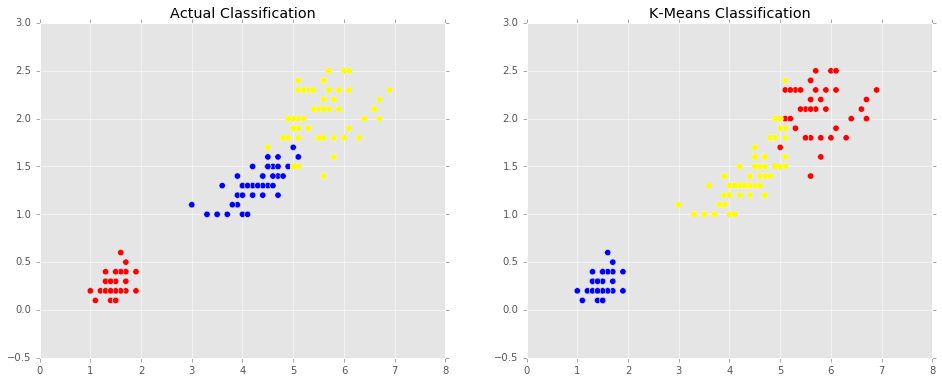

In [181]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Actual Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[labels], s=40)
plt.title('K-Means Classification')

#### Check the centroids

In [194]:
# same as we saw above
print(centroids)

[[ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85        3.07368421  5.74210526  2.07105263]]


#### Check the labels

In [196]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [195]:
print(pred_cluster)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [199]:
# we can see there is a permutation in the labels - we need to swap 0 and 1
# we do this below

In [200]:
# handle permutations - we set it so that labels is corrected
from scipy import stats
labels = np.zeros_like(pred_cluster)
for i in range(k):
    mask = (pred_cluster == i)
    labels[mask] = stats.mode(iris.target[mask])[0]

In [214]:
# to understand what is going on above try changing the label here
stats.mode(iris.target[pred_cluster == 1])[0]

array([0])

#### Accuracy Score

In [201]:
metrics.accuracy_score(iris.target, labels)

0.89333333333333331

#### Compute the Silhoutte Score

In [202]:
metrics.silhouette_score(iris.target.reshape(-1,1), labels, metric='euclidean')

0.70172421600536772

#### Calculate the Precision, Recall, and F - Score

In [203]:
print(metrics.classification_report(iris.target, labels))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150



#### Check the Confusion Matrix

In [204]:
print(metrics.confusion_matrix(iris.target, labels))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
